### An Example of GLM with PyMC3: Disaster Model

Here we are going to be modeling the number of mining disasters in the UK from 1851-1962 using switchpoint analysis. Switchpoint analysis involves a point in time where a parameter of our model changes values.

In [11]:
import numpy as np
import theano.tensor as tt 
import matplotlib.pyplot as plt
import pymc3 as pm

In [12]:
# data for model
disaster_data = np.array([4, 5, 4, 0, 1, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6,
                          3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5, 3, 4, 2, 5,
                          2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0,
                          1, 0, 1, 1, 0, 0, 3, 1, 0, 3, 2, 2, 0, 1, 1, 1,
                          0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2,
                          3, 3, 1, 1, 2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 1, 4,
                          0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1])

year = np.arange(1851, 1962)

Below is an image similar to what Alex was showing us today for graphical modeling. Here we see that the values of `switchpoint`, `early_mean`, and `late_mean` do not depend on any other variables. It is important to note that the `rate` parameter is directly dependent on the values of `switchpoint`, `early_mean`, and `late_mean`. This is because the rate parameter will change depending on the year switchpoint specifies. We observe the values of `disaster`. We will end up using Baye's Rule with the disaster variable to calculate the posterior of the other variables. 

In [13]:
# model
with pm.Model() as disaster_model:

    switchpoint = pm.DiscreteUniform('switchpoint', lower=year.min(), upper=year.max())
    early_mean = pm.Exponential('early_mean', lam=1.)
    late_mean = pm.Exponential('late_mean', lam=1.)

    rate = tt.switch(switchpoint >= year, early_mean, late_mean)

    disaster = pm.Poisson('disaster', rate, observed=disaster_data)

    start = {'early_mean': 2, 'late_mean': 3}

- We use a discrete uniform random variables for the switchpoint year because all years are equaly likely.
- We use exponential with $\lambda$ = 1 for both means so smaller values are more likely. 
- We use a poisson random variable for the disasters because number of disasters are discrete and non-negative 

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>CompoundStep
>>Metropolis: [late_mean]
>>Metropolis: [early_mean]
>>Metropolis: [switchpoint]
>NUTS: [late_mean, early_mean]
Sampling 2 chains: 100%|██████████| 21000/21000 [00:13<00:00, 1521.60draws/s]
The number of effective samples is smaller than 10% for some parameters.


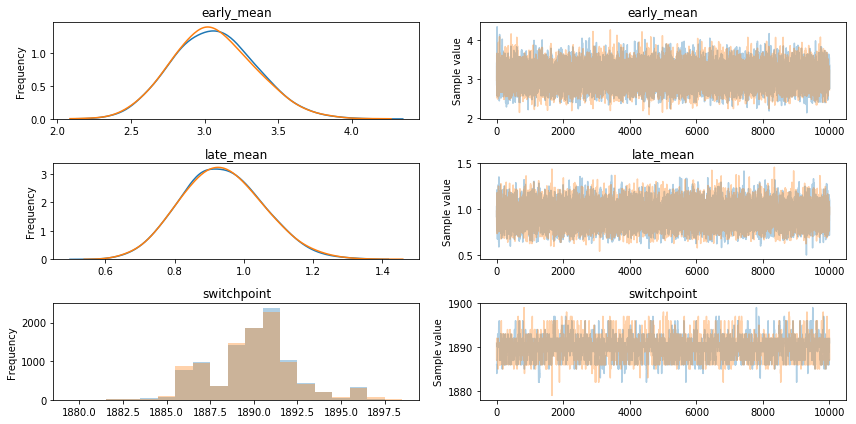

In [14]:
with disaster_model:
    trace = pm.sample(10000, step=[pm.Metropolis(), pm.NUTS()])
    pm.traceplot(trace, ['early_mean', 'late_mean', 'switchpoint'])
    plt.show()

It looks like the the `early_mean` value is between 2.5 to 3.75 while the `late_mean` is between 0.6 and 1.2. This is reassuring because we expected that `late_mean` to be less than the `early_mean`. It looks like the `switchpoint` is between 1888-1892 this is good because the new legislation was officially introduced in 1890. 